**IMPORT LIBRARY**

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
root_dir = "/kaggle/input/final-dataset-me"
def validate_image_file(file_path):
    """
    Validate if a file can be processed by TensorFlow's image pipeline.
    Returns True if the file is valid, False otherwise.
    """
    try:
        img = tf.io.read_file(file_path)
        img = tf.image.decode_image(img, channels=3)
        img = tf.image.resize(img, [224, 224])
        return True
    except:
        return False

def filter_valid_files(directory, extensions=(".jpg", ".jpeg", ".png", ".bmp", ".tiff")):
    """
    Traverse a directory and return a list of valid image file paths.
    """
    valid_files = []
    invalid_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(extensions):
                file_path = os.path.join(root, file)
                if validate_image_file(file_path):
                    valid_files.append(file_path)
                else:
                    invalid_files.append(file_path)

    print(f"Found {len(invalid_files)} invalid files.")
    for file in invalid_files:
        print(file)
    return valid_files

In [3]:
valid_files = filter_valid_files(root_dir)

Found 0 invalid files.


**counting num of train, dev, test sets**

In [4]:
for dir in os.listdir(root_dir):
    image_count = 0
    dir_path = os.path.join(root_dir, dir)
    for dirname, _, subdirname in os.walk(f"{dir_path}"):
        image_count += len(subdirname)
    print(f"Total number of images in {dir} and its subdirectories: {image_count}")

Total number of images in Final Dataset ME and its subdirectories: 13971


**defining some globals with the paths to the training and test folders**

In [5]:
TRAINING_DIR = os.path.join(root_dir, 'Final Dataset ME', 'train')
VALIDATION_DIR = os.path.join(root_dir, 'Final Dataset ME', 'dev')
TEST_DIR = os.path.join(root_dir, 'Final Dataset ME', 'test')

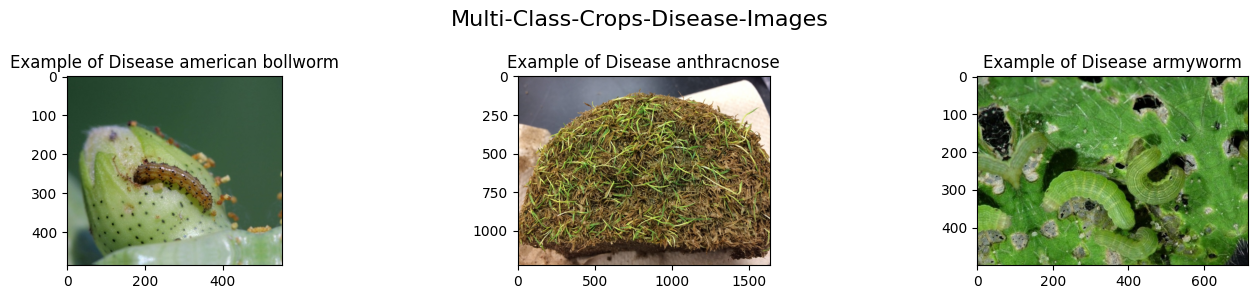

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(14, 3))
fig.suptitle('Multi-Class-Crops-Disease-Images', fontsize=16)

# Plot one image from the first 4 diseases
for i, disease in enumerate(['american bollworm' , 'anthracnose', 'armyworm']):
    dir = os.path.join(TRAINING_DIR, disease)
    img_path = os.path.join(dir, os.listdir(dir)[0])
    img = tf.keras.preprocessing.image.load_img(img_path)
    axes[i].imshow(img)
    axes[i].set_title(f'Example of Disease {disease}')

plt.tight_layout()
plt.show()

**checking distribution of images in training and validation set**

In [9]:
def show_distribution(DIR_):
    subdirectory_names = []
    image_counts = []
    
    print(f"{os.path.basename(DIR_)} IMAGES:")
    for dirname, _, filenames in os.walk(DIR_):
        if dirname != DIR_:  # Exclude the root directory
            img_count = len(filenames)
            subdirectory_name = os.path.basename(dirname)
            subdirectory_names.append(subdirectory_name)
            image_counts.append(img_count)
            print(f"Total number of images in '{subdirectory_name}' is {img_count}")
    
    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.bar(subdirectory_names, image_counts, color='skyblue')
    plt.xlabel('Subdirectories', fontsize=14)
    plt.ylabel('Image Count', fontsize=14)
    plt.title('Image Count in Each Subdirectory', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

train IMAGES:
Total number of images in 'redrust sugarcane' is 260
Total number of images in 'healthy maize' is 260
Total number of images in 'tungro' is 260
Total number of images in 'healthy sugarcane' is 260
Total number of images in 'wheat mite' is 260
Total number of images in 'thirps' is 258
Total number of images in 'cotton aphid' is 260
Total number of images in 'wheat brown rust' is 260
Total number of images in 'yellow rust sugarcane' is 260
Total number of images in 'wheat scab' is 260
Total number of images in 'pink bollworm' is 257
Total number of images in 'anthracnose' is 259
Total number of images in 'wheat leaf blight' is 260
Total number of images in 'healthy cotton' is 260
Total number of images in 'wilt' is 260
Total number of images in 'whitefly cotton' is 260
Total number of images in 'mealy bugs' is 259
Total number of images in 'rice blast' is 260
Total number of images in 'maize ear rot' is 260
Total number of images in 'gray leaf spot' is 260
Total number of i

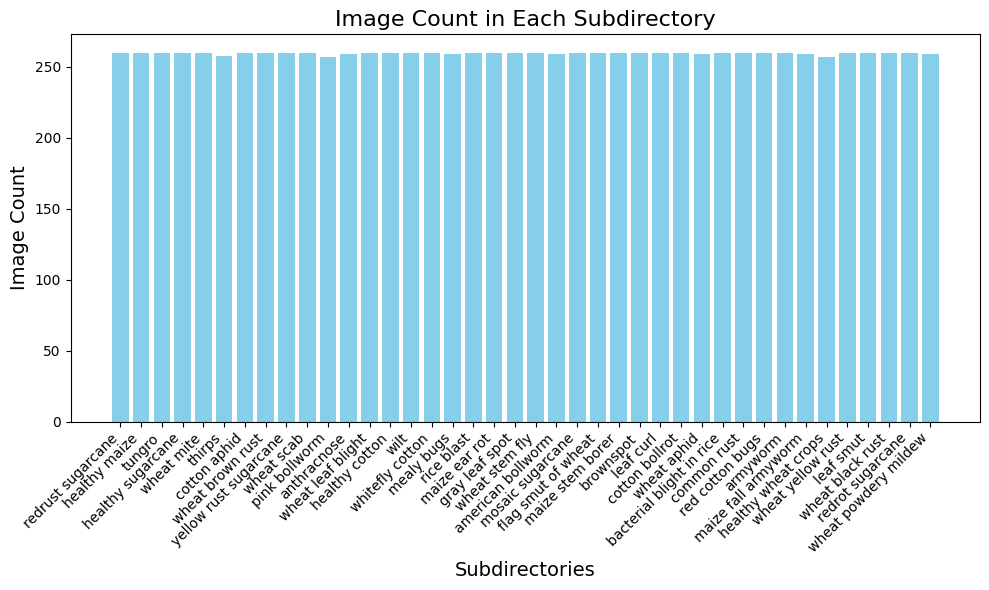

dev IMAGES:
Total number of images in 'redrust sugarcane' is 45
Total number of images in 'healthy maize' is 45
Total number of images in 'tungro' is 45
Total number of images in 'healthy sugarcane' is 45
Total number of images in 'wheat mite' is 45
Total number of images in 'thirps' is 45
Total number of images in 'cotton aphid' is 45
Total number of images in 'wheat brown rust' is 45
Total number of images in 'yellow rust sugarcane' is 45
Total number of images in 'wheat scab' is 45
Total number of images in 'pink bollworm' is 43
Total number of images in 'anthracnose' is 45
Total number of images in 'wheat leaf blight' is 45
Total number of images in 'healthy cotton' is 45
Total number of images in 'wilt' is 45
Total number of images in 'whitefly cotton' is 44
Total number of images in 'mealy bugs' is 44
Total number of images in 'rice blast' is 45
Total number of images in 'maize ear rot' is 45
Total number of images in 'gray leaf spot' is 45
Total number of images in 'wheat stem f

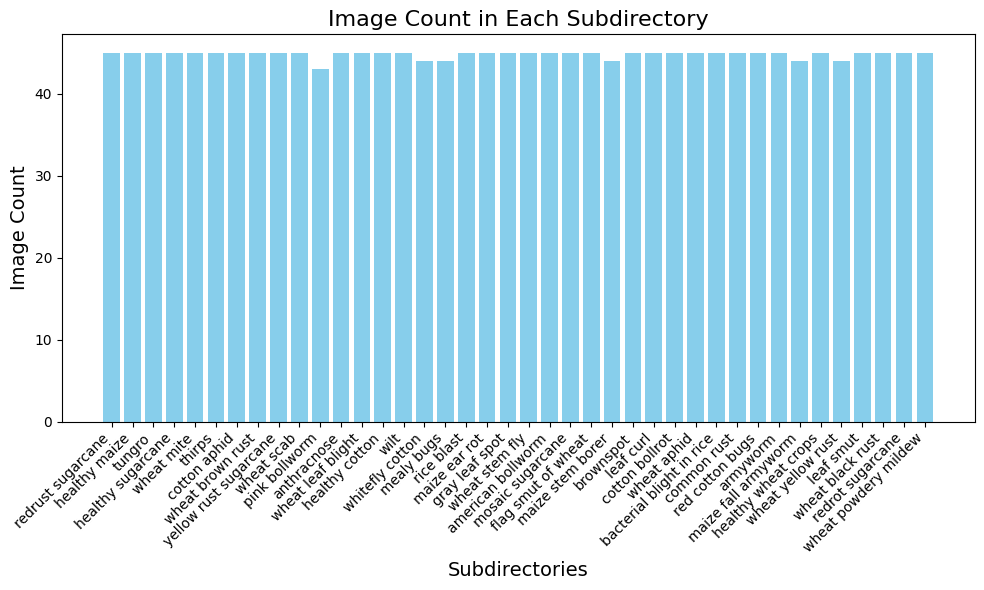

test IMAGES:
Total number of images in 'redrust sugarcane' is 42
Total number of images in 'healthy maize' is 45
Total number of images in 'tungro' is 45
Total number of images in 'healthy sugarcane' is 45
Total number of images in 'wheat mite' is 45
Total number of images in 'thirps' is 45
Total number of images in 'cotton aphid' is 45
Total number of images in 'wheat brown rust' is 45
Total number of images in 'yellow rust sugarcane' is 45
Total number of images in 'wheat scab' is 45
Total number of images in 'pink bollworm' is 45
Total number of images in 'anthracnose' is 43
Total number of images in 'wheat leaf blight' is 45
Total number of images in 'healthy cotton' is 45
Total number of images in 'wilt' is 45
Total number of images in 'whitefly cotton' is 45
Total number of images in 'mealy bugs' is 44
Total number of images in 'rice blast' is 45
Total number of images in 'maize ear rot' is 45
Total number of images in 'gray leaf spot' is 45
Total number of images in 'wheat stem 

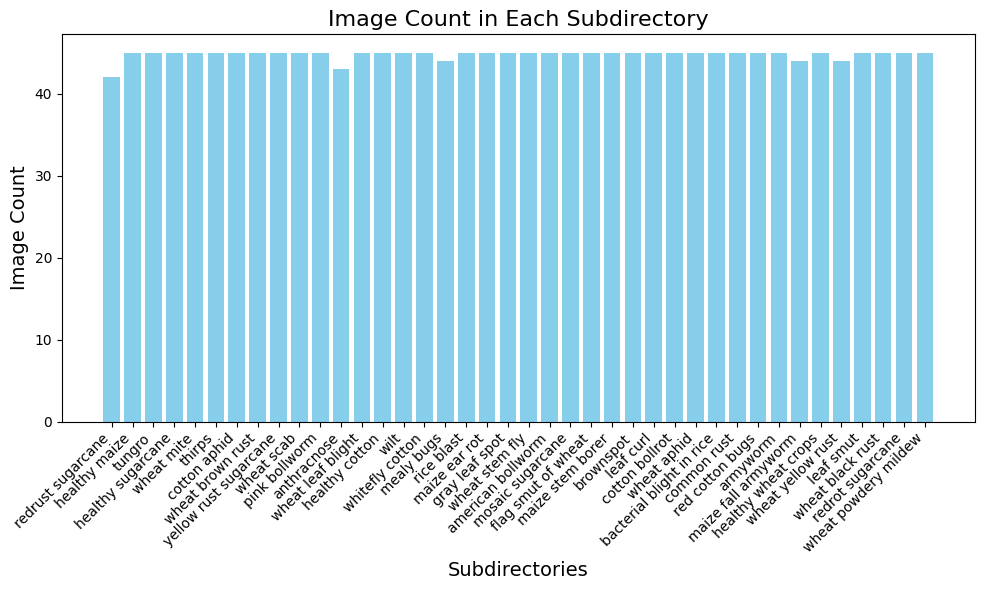

In [10]:
show_distribution(TRAINING_DIR)
show_distribution(VALIDATION_DIR)
show_distribution(TEST_DIR)

**count each class images**

In [14]:
def count_each_class(root_dir, image_counts, all_class_names):
    for DIRNAME_ROOT in os.listdir(root_dir):
        for DIRNAME in os.listdir(os.path.join(root_dir, DIRNAME_ROOT)):
            DIRNAME_PATH = os.path.join(root_dir, DIRNAME_ROOT,DIRNAME)
            for dirname, _, filenames in os.walk(DIRNAME_PATH):
                if dirname != DIRNAME_PATH:  # Exclude the root directory
                    img_cnt = len(filenames)
                    subdirectory_name = os.path.basename(dirname).lower()  # Convert to lowercase
                    if subdirectory_name not in all_class_names:
                        all_class_names.append(subdirectory_name)
                        image_counts[subdirectory_name] = img_cnt
                    else:
                        image_counts[subdirectory_name] += img_cnt  # Sum counts if directory already exists
        return image_counts

In [15]:
# Get the counts from both directories
image_counts = {}
image_counts = count_each_class(root_dir, image_counts, [])
for subdir, cnt in image_counts.items():
    print(f"There are {cnt} of {subdir} images")

There are 347 of redrust sugarcane images
There are 350 of healthy maize images
There are 350 of tungro images
There are 350 of healthy sugarcane images
There are 350 of wheat mite images
There are 348 of thirps images
There are 350 of cotton aphid images
There are 350 of wheat brown rust images
There are 350 of yellow rust sugarcane images
There are 350 of wheat scab images
There are 345 of pink bollworm images
There are 347 of anthracnose images
There are 350 of wheat leaf blight images
There are 350 of healthy cotton images
There are 350 of wilt images
There are 349 of whitefly cotton images
There are 347 of mealy bugs images
There are 350 of rice blast images
There are 350 of maize ear rot images
There are 350 of gray leaf spot images
There are 350 of wheat stem fly images
There are 349 of american bollworm images
There are 350 of mosaic sugarcane images
There are 350 of flag smut of wheat images
There are 349 of maize stem borer images
There are 350 of brownspot images
There are 3


**Creating datasets for CNN<br>Train_Val datasets**


In [82]:
def train_val_datasets(TRAINING_DIR, VALIDATION_DIR, TEST_DIR):
    train_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=TRAINING_DIR,
        batch_size=32,
        image_size=(224,224),
		label_mode='categorical',
        color_mode = "rgb",
    ) 
    
    validation_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=VALIDATION_DIR,
        batch_size=32,
        image_size=(224,224),
		label_mode='categorical',
        color_mode = "rgb",
    ) 

    test_dataset = tf.keras.utils.image_dataset_from_directory( 
        directory=VALIDATION_DIR,
        batch_size=32,
        image_size=(224,224),
		label_mode='categorical',
        color_mode = "rgb",
    ) 
    return train_dataset, validation_dataset, test_dataset

In [5]:
'''''
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input
def train_val_datasets():
    train_datagen = ImageDataGenerator(
        rescale=1.0/255,            # Rescale pixel values to [0, 1]
        preprocessing_function = preprocess_input,
        shear_range=0.2,            # Shear transformations
        zoom_range=0.2,             # Zoom transformations
        horizontal_flip=True,       # Horizontal flip
        rotation_range=20,          # Random rotation in degrees
        width_shift_range=0.2,      # Horizontal translation
        height_shift_range=0.2,     
    )
    val_datagen = ImageDataGenerator(
        rescale = 1./255,
        preprocessing_function = preprocess_input
    )
    
    train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(224, 224),     # Resize images to 224x224
        batch_size=32,
        class_mode='categorical'    # Use categorical labels
    )

    validation_generator = val_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(224, 224),     # Resize images to 224x224
        batch_size=32,
        class_mode='categorical'    # Use categorical labels
    )
    return train_generator, validation_generator

In [84]:
# Create train and validation datasets
train_dataset, validation_dataset, test_dataset = train_val_datasets(TRAINING_DIR, VALIDATION_DIR, TEST_DIR)

Found 10386 files belonging to 40 classes.
Found 1793 files belonging to 40 classes.
Found 1793 files belonging to 40 classes.


In [85]:
class_names = train_dataset.class_names

In [19]:
(images, labels) = list(train_dataset.take(1))[0]
example_batch_images = images
example_batch_labels = labels
print(images.shape)
print(labels.shape)

(32, 224, 224, 3)
(32, 40)


**Create Augmentation Layer**

In [20]:
augmentation_model = tf.keras.Sequential([ 
	tf.keras.Input(shape=(224,224,3)),
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2, fill_mode = 'nearest'),
    tf.keras.layers.RandomTranslation(0.2, 0.2, fill_mode = 'nearest'),
    tf.keras.layers.RandomZoom(0.2, fill_mode = 'nearest')
]) 

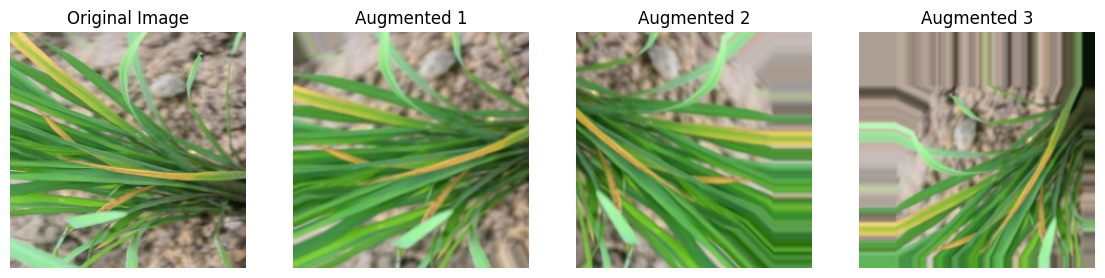

In [80]:
# Load your model for augmentation
data_augmentor = augmentation_model

# Take a sample image
sample_image = tf.keras.utils.array_to_img(example_batch_images[0])

images = [sample_image]

# Apply random augmentation 3 times
for _ in range(3):
	image_aug = data_augmentor(tf.expand_dims(sample_image, axis=0))
	image_aug = tf.keras.utils.array_to_img(tf.squeeze(image_aug))
	images.append(image_aug)


fig, axs = plt.subplots(1, 4, figsize=(14, 7))
for ax, image, title in zip(axs, images, ['Original Image', 'Augmented 1', 'Augmented 2', 'Augmented 3']):
    ax.imshow(image, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.show()

**create pre trained model**

In [67]:
pre_trained_model = tf.keras.applications.EfficientNetB0( 
    include_top=False, 
    input_shape=(224,224,3),
    weights='/kaggle/input/efficientnetb0-weights/efficientnetb0_notop.h5'
) 

# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

**define callback**

In [34]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] and logs['val_accuracy']>0.95:
            self.model.stop_training = True
            print("\nReached 85% accuracy so cancelling training!")

In [68]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric yang diamati, bisa juga 'val_accuracy'
    patience=5,          # Jumlah epoch untuk menunggu perbaikan
    restore_best_weights=True  # Kembalikan model ke bobot terbaik
)

In [35]:
pre_trained_model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ normalization[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 112, 112,  │         64 │ block1a_project_

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [16]:
'''''
def output_of_last_layer(pre_trained_model):
    last_desired_layer = pre_trained_model.get_layer('block2b_se_squeeze')
    last_output = last_desired_layer.output
    print('last layer output shape: ', last_output.shape)
    return last_output
'''''

In [17]:
# last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 144)


In [41]:
'''''
inputs = tf.keras.Input(shape=(224,224,3))
x = data_augmentor(inputs)
x = pre_trained_model(x)
x = tf.keras.layers.GlobalAveragePooling2D() (x)
x = tf.keras.layers.Dense(1024, activation='relu') (x)
x = tf.keras.layers.Dropout(0.2) (x)
x = tf.keras.layers.Dense(42, activation='linear') (x)       

model = tf.keras.Model(inputs= inputs, outputs=x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001),
                  loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy']
             )
'''''

In [69]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(224,224,3)),
    pre_trained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(40, activation='linear')                  ,
])

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001),
                  loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy']
             )

**Use the tf.keras.applications.efficientnet.preprocess_input function to preprocess images correctly. This function ensures the images are scaled and normalized as required by EfficientNet.******

In [70]:
preprocess_input = tf.keras.applications.efficientnet.preprocess_input
def preprocess_dataset(dataset):
    return dataset.map(lambda x, y: (preprocess_input(x), y))

train_dataset = preprocess_dataset(train_dataset)
validation_dataset = preprocess_dataset(validation_dataset)

train_dataset = train_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
'''''
model = tf.keras.models.Sequential([ 
        tf.keras.Input(shape=(224,224,3)), # Set correct input size
        pre_trained_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(1024, activation = 'relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(42, activation ='softmax')
        ]) 

model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001),
                  loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                  metrics = ['accuracy'])                                                    
'''''

"''\nmodel = tf.keras.models.Sequential([ \n        tf.keras.Input(shape=(224,224,3)), # Set correct input size\n        pre_trained_model,\n        tf.keras.layers.GlobalAveragePooling2D(),\n        tf.keras.layers.Dense(1024, activation = 'relu'),\n        tf.keras.layers.Dropout(0.2),\n        tf.keras.layers.Dense(42, activation ='softmax')\n        ]) \n\nmodel.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001),\n                  loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False),\n                  metrics = ['accuracy'])                                                    \n"

In [71]:
history = model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 15,
    verbose = 1,
    callbacks=[early_stopping],
)

Epoch 1/15
325/325 ━━━━━━━━━━━━━━━━━━━━ 60s 101ms/step - accuracy: 0.3447 - loss: 2.7779 - val_accuracy: 0.6721 - val_loss: 1.3294
Epoch 2/15
325/325 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.6649 - loss: 1.2918 - val_accuracy: 0.7384 - val_loss: 0.9936
Epoch 3/15
325/325 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.7368 - loss: 0.9962 - val_accuracy: 0.7719 - val_loss: 0.8425
Epoch 4/15
325/325 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.7697 - loss: 0.8392 - val_accuracy: 0.7948 - val_loss: 0.7494
Epoch 5/15
325/325 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.7969 - loss: 0.7194 - val_accuracy: 0.8160 - val_loss: 0.6832
Epoch 6/15
325/325 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.8237 - loss: 0.6357 - val_accuracy: 0.8238 - val_loss: 0.6335
Epoch 7/15
325/325 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.8464 - loss: 0.5682 - val_accuracy: 0.8338 - val_loss: 0.5913
Epoch 8/15
325/325 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.8589 - loss: 0.5174 -

In [66]:
import tensorflow.keras.backend as K

K.clear_session()

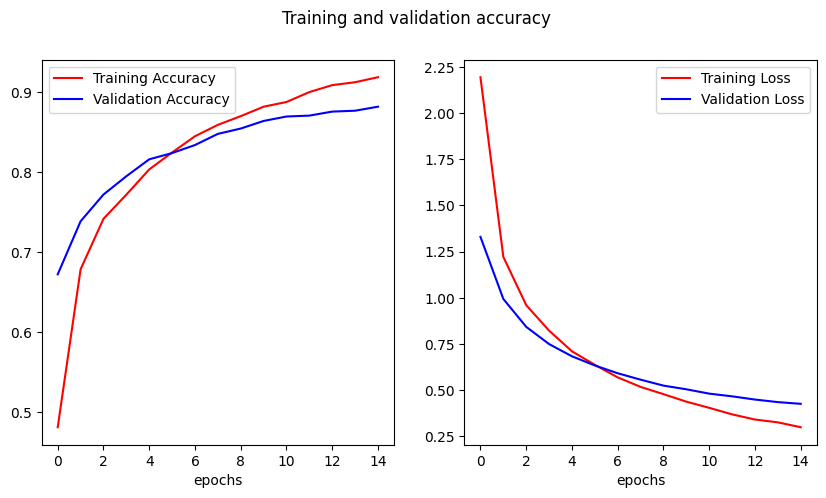

In [72]:
# Get training and validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

diff_acc = np.array(acc) - np.array(val_acc)
diff_loss = np.array(val_loss) - np.array(loss)

print(diff_acc)
print(diff_loss)

[-0.19131467 -0.06001395 -0.03041178 -0.02304542 -0.01265806  0.00071615
  0.01099294  0.01129985  0.01548713  0.01784873  0.01814473  0.02944988
  0.03309584  0.03563917  0.03687811]
[-0.86415303 -0.22759706 -0.11762804 -0.07275689 -0.02705145 -0.00354028
  0.02231503  0.03908491  0.04625285  0.06689736  0.07687831  0.09759009
  0.10803127  0.10958445  0.12659404]


In [75]:
folder_path = 'models'

# Membuat folder jika belum ada
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Menyimpan model ke dalam folder tersebut
model.save(os.path.join(folder_path, 'my_model_15.h5'))

In [78]:
from tensorflow.keras.models import load_model

model = load_model('/kaggle/working/models/my_model_15.h5')
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=1)

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 148ms/step - accuracy: 0.8680 - loss: 0.4451
Test Accuracy: 0.88
Test Loss: 0.43


In [87]:
print(class_names)

['american bollworm', 'anthracnose', 'armyworm', 'bacterial blight in rice', 'brownspot', 'common rust', 'cotton aphid', 'cotton bollrot', 'flag smut of wheat', 'gray leaf spot', 'healthy cotton', 'healthy maize', 'healthy sugarcane', 'healthy wheat crops', 'leaf curl', 'leaf smut', 'maize ear rot', 'maize fall armyworm', 'maize stem borer', 'mealy bugs', 'mosaic sugarcane', 'pink bollworm', 'red cotton bugs', 'redrot sugarcane', 'redrust sugarcane', 'rice blast', 'thirps', 'tungro', 'wheat aphid', 'wheat black rust', 'wheat brown rust', 'wheat leaf blight', 'wheat mite', 'wheat powdery mildew', 'wheat scab', 'wheat stem fly', 'wheat yellow rust', 'whitefly cotton', 'wilt', 'yellow rust sugarcane']


In [120]:
category = {}
for i, class_name in enumerate(class_names):
    category[i] = class_name
print (category)

{0: 'american bollworm', 1: 'anthracnose', 2: 'armyworm', 3: 'bacterial blight in rice', 4: 'brownspot', 5: 'common rust', 6: 'cotton aphid', 7: 'cotton bollrot', 8: 'flag smut of wheat', 9: 'gray leaf spot', 10: 'healthy cotton', 11: 'healthy maize', 12: 'healthy sugarcane', 13: 'healthy wheat crops', 14: 'leaf curl', 15: 'leaf smut', 16: 'maize ear rot', 17: 'maize fall armyworm', 18: 'maize stem borer', 19: 'mealy bugs', 20: 'mosaic sugarcane', 21: 'pink bollworm', 22: 'red cotton bugs', 23: 'redrot sugarcane', 24: 'redrust sugarcane', 25: 'rice blast', 26: 'thirps', 27: 'tungro', 28: 'wheat aphid', 29: 'wheat black rust', 30: 'wheat brown rust', 31: 'wheat leaf blight', 32: 'wheat mite', 33: 'wheat powdery mildew', 34: 'wheat scab', 35: 'wheat stem fly', 36: 'wheat yellow rust', 37: 'whitefly cotton', 38: 'wilt', 39: 'yellow rust sugarcane'}


In [134]:
import requests
from io import BytesIO
from PIL import Image

# Memuat model yang telah disimpan
model = tf.keras.models.load_model('/kaggle/working/models/my_model_15.h5')


img = Image.open('/kaggle/input/crops/Train/Flag Smut/0161.jpg')
# Mengubah gambar menjadi ukuran yang sesuai dengan model (misalnya 224x224)
img = img.resize((224, 224))

# Mengubah gambar menjadi array numpy
img_array = np.array(img)

img_array = np.expand_dims(img_array, axis=0)

# Melakukan prediksi
predictions = model.predict(img_array)
predicted_class = np.argmax(tf.nn.softmax(predictions[0]).numpy())
print(predicted_class)



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
8


In [136]:
print(category[predicted_class])


flag smut of wheat


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━

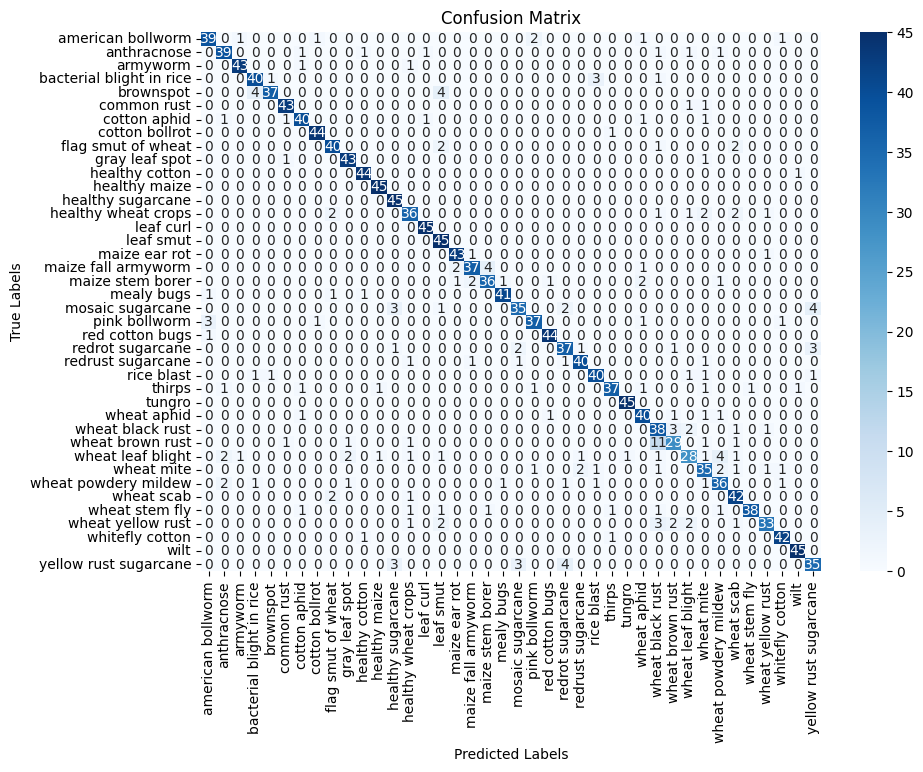

In [142]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat model yang telah dilatih
model = tf.keras.models.load_model('/kaggle/working/models/my_model_15.h5')

# Menyiapkan list untuk menyimpan label dan prediksi
y_true = []
y_pred = []

# Iterasi atas dataset uji untuk mendapatkan label dan prediksi
for images, labels in test_dataset:
    # Prediksi untuk batch
    predictions = model.predict(images)
    
    # Mengonversi prediksi menjadi kelas dengan probabilitas tertinggi
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Mengonversi labels menjadi kelas
    true_classes = np.argmax(labels.numpy(), axis=1)  # Label dalam bentuk one-hot, diubah ke kelas
    
    # Menyimpan label dan prediksi
    y_true.extend(true_classes)
    y_pred.extend(predicted_classes)

# Membuat classification report untuk Precision, Recall, dan F1 Score per kategori
report = classification_report(y_true, y_pred, target_names=test_dataset.class_names)
print("Classification Report:\n", report)

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.class_names, yticklabels=test_dataset.class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
